# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here

# define function
def ten_dice_rolls():
    return pd.DataFrame(random.choices(range(1,7), k=10))

# test function
dice_rolls = ten_dice_rolls()

#### 2.- Plot the results sorted by value.

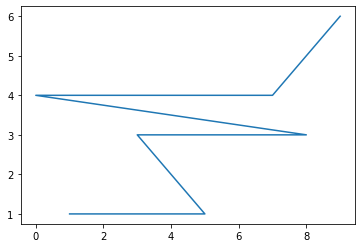

In [91]:
# your code here

# define bars
bars = list(dice_rolls[0].value_counts().index)

# define heights of bars
heights = list(dice_rolls[0].value_counts())

# define plot
plt.bar(bars, heights)

# define plot
#plt.plot(dice_rolls[0].sort_values())

# display plot
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([3., 0., 3., 3., 0., 1.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

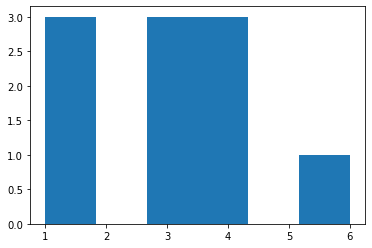

In [5]:
# your code here

# create a histogram
plt.hist(dice_rolls[0], bins=6)



In [ ]:
"""
your comments here

With the bar chart you get discreet bars, while with the histogram they go into each other and you decide the number of bins
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

# define fucntion
def _mean(df_series):
    return df_series.sum()/len(df_series)

# test function
_mean(dice_rolls[0])

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
# your code here

# calculate frequency distribution using value_counts()
freq_dist = dice_rolls[0].value_counts()

# calculate mean
sum(freq_dist) / len(freq_dist.index)


2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [34]:
# your code here

# define function
def _median(df_series):
    if len(df_series) % 2 == 0:
        first_middle = df_series.sort_values().reset_index(drop=True)[len(df_series)/2]
        second_middle = df_series.sort_values().reset_index(drop=True)[(len(df_series)/2)-1]
        median = (first_middle + second_middle) / 2
    else:
        median = df_series.sort_values().reset_index(drop=True)[(len(df_series)+1)/2]
    return median

# test function
_median(dice_rolls[0])


3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [47]:
# your code here

# define function
def quartile(data):
            data = data.sort_values().reset_index(drop=True)               
            half_list = int(len(data)//2)
            upperdata = data[half_list:]
            lowerdata = data[:half_list]
            upper_quartile = _median(upperdata)
            lower_quartile = _median(lowerdata)
            print("Lower Quartile: "+str(lower_quartile))
            print("Upper Quartile: "+str(upper_quartile))

# test function
quartile(dice_rolls[0]) 


Lower Quartile: 3
Upper Quartile: 4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

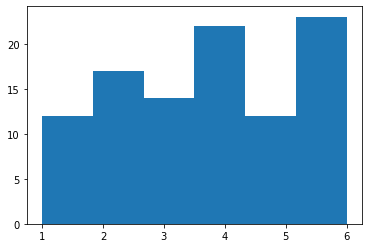

In [57]:
# your code here

# load file
roll_the_dice_hundred = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv", index_col=0)

# check out df
plt.hist(roll_the_dice_hundred["value"], bins=6)

plt.show()


In [ ]:
"""
your comments here

There are some differences in the number of instances of each number. The number 6 has the highest frequency. 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [58]:
# your code here

# apply _mean function
_mean(roll_the_dice_hundred["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [59]:
# your code here

# frequency distribution using value_counts()
roll_the_dice_hundred["value"].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

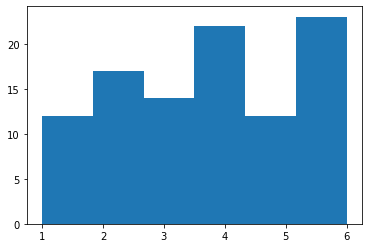

In [61]:
# your code here

# create histogram
plt.hist(roll_the_dice_hundred["value"], bins=6)

# display plot
plt.show()

In [ ]:
"""
your comments here

There are some differences in the number of instances of each number. The number 6 has the highest frequency. 

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

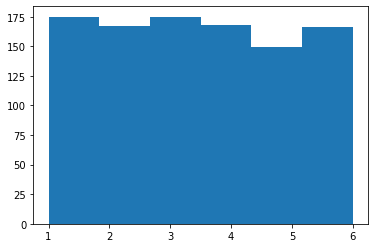

In [63]:
# your code here

# load file
roll_the_dice_hundred = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv", index_col=0)

# check out df
plt.hist(roll_the_dice_hundred["value"], bins=6)

plt.show()

In [ ]:
"""
your comments here

With the increasing number of instances, the differences between the numbers get smaller. Since it should be the same probability for each number, the differences will disappear more or less if we have enough observations. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


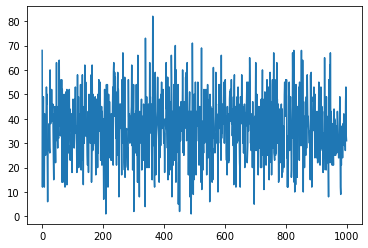

In [73]:
# your code here

# load file
ages_population = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-understanding-descriptive-stats/data/ages_population.csv", index_col=0)

ages_population.reset_index(drop=False, inplace=True)

# check out df
display(ages_population)

# create plot
plt.plot(ages_population["observation"])

# show plot
plt.show()

# guesses for mean and standard deviation
# mean = 35
# std = 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [75]:
# your code here

# mean
print(ages_population.mean())

#std
print(np.std(ages_population))

observation    36.56
dtype: float64
observation    12.81009
dtype: float64


In [ ]:
"""
your comments here

# The guesses are similar to what the values are
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


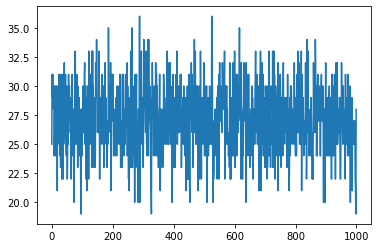

In [76]:
# your code here

# load file
ages_population2 = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-understanding-descriptive-stats/data/ages_population2.csv", index_col=0)

ages_population2.reset_index(drop=False, inplace=True)

# check out df
display(ages_population2)

# create plot
plt.plot(ages_population2["observation"])

# show plot
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

# the distribution is tighter around the mean. There is not as much variation. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [78]:
# your code here

# mean
print(ages_population2.mean())

#std
print(np.std(ages_population2))

observation    27.155
dtype: float64
observation    2.968329
dtype: float64


In [ ]:
"""
your comments here

# As predicted, the standard deviation is much lower
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


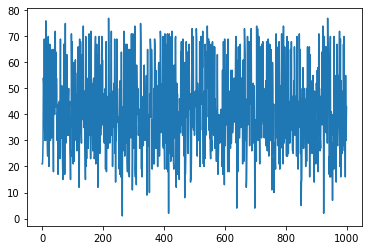

In [79]:
# your code here

# load file
ages_population3 = pd.read_csv("/Users/rickardramhoj/ironhack_assignments/lab-understanding-descriptive-stats/data/ages_population3.csv", index_col=0)

ages_population3.reset_index(drop=False, inplace=True)

# check out df
display(ages_population3)

# create plot
plt.plot(ages_population3["observation"])

# show plot
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [81]:
# your code here

# mean
print(ages_population3.mean())

#std
print(np.std(ages_population3))

observation    41.989
dtype: float64
observation    16.136632
dtype: float64


In [ ]:
"""
your comments here

# the standard deviation is higher and the mean is higher as well
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [85]:
# your code here

#1st quartile 
print(ages_population3.quantile(0.25))

#2nd quartile 
print(ages_population3.quantile(0.5))

#3rd quartile 
print(ages_population3.quantile(0.75))

# mean
print(ages_population3.mean())

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64
observation    41.989
dtype: float64


In [ ]:
"""
your comments here

# the median and the mean are close. The difference is 1.989. It is slightly skewed. 

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

observation    1.0
dtype: float64
observation    22.0
Name: 0.1, dtype: float64
observation    67.0
Name: 0.9, dtype: float64
observation    77.0
dtype: float64


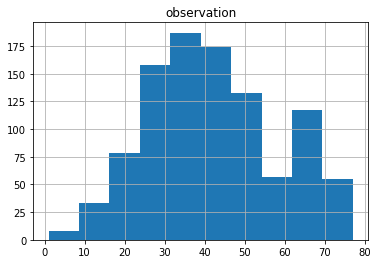

In [89]:
# your code here

# min
print(ages_population3.min())

# 10 % quantile
print(ages_population3.quantile(0.10))

# 90 % quantile
print(ages_population3.quantile(0.90))

# max
print(ages_population3.max())

ages_population3.hist()

plt.show()

In [ ]:
"""
your comments here

The dataset is positively skewed, which also can be seen in a histogram. 
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""